In [47]:
import sys 
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import glob

In [48]:
def prepare_dfs():
    flir_df = pd.read_csv('./FlirIr/individual_thermal_out/individual_temps.csv')\
        .set_index('plot')\
        .drop(['min_x', 'max_x', 'min_y', 'max_y', 'nw_lat', 'nw_lon', 'se_lat', 'se_lon'], axis=1)

    fb = pd.read_csv('./Gantry_fieldbook_2020_Revised_Irr_TRT.csv')\
        .drop(['Experiment', 'SbEMS_ID', 'Harvest_Id', 'PI_check', 'Unnamed: 13', 'Unnamed: 14'], axis=1)\
        .set_index('Plot')
    
    flir_df = fb.join(flir_df).dropna().convert_dtypes()
    flir_df['median'] = flir_df['median'] - 273.15
    
    psii_df = pd.read_csv(glob.glob('./psII/2020-09-11_sub1_fluorescence_aggregation/*_fluorescence_aggregation.csv')[0])\
              .set_index('Plot')\
              .drop('Unnamed: 0', axis=1)
    psii_df = fb.join(psii_df).dropna().convert_dtypes()
    
    return flir_df, psii_df

In [49]:
flir_df, psii_df = prepare_dfs()

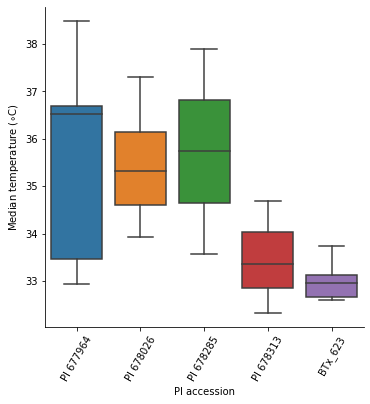

In [50]:
g = sns.catplot(x='PI_accession',
                y='median',
                kind='box',
                data=flir_df)

g.set_axis_labels( "PI accession" , "Median temperature ($\circ$C)" )
g.set_xticklabels(rotation=60)

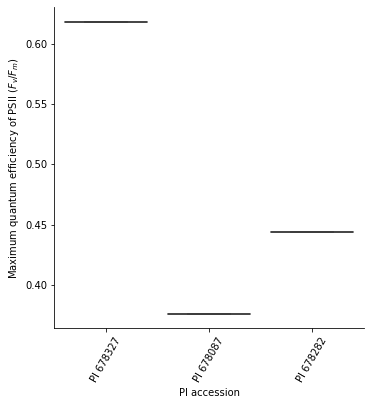

In [51]:
g = sns.catplot(x='PI_accession',
                y='FV/FM',
                kind='box',
                data=psii_df)

g.set_axis_labels( "PI accession" , "Maximum quantum efficiency of PSII ($F_v$/$F_m$)" )
g.set_xticklabels(rotation=60)